In [1]:
from Network import Generator, Discriminator
import Utils
from keras.applications.vgg19 import VGG19

import keras.backend as K
from keras.models import Model
from keras.layers import Input
from keras.layers import Add
from keras.optimizers import Adam
from keras.layers.core import Activation
from keras.layers.convolutional import UpSampling2D, Conv2D, Conv2DTranspose
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.layers.normalization import BatchNormalization
from keras.models import load_model

from skimage import data, io
from PIL import Image
from matplotlib import pyplot as plt
from tqdm import tqdm, tqdm_notebook
import numpy as np

Using TensorFlow backend.


In [2]:
input_image_shape = (480,270,3)
output_image_shape = (1920,1080,3)
downscale_factor = 4

## Data

In [3]:
photo_input_dir = '../images/photo_fullhd'
ukiyo_input_dir = '../images/ukiyo-e_fullhd'
number_of_images = 100
train_test_ratio = 0.99

In [4]:
photo_lr, photo_hr, _, _ = Utils.load_training_data(photo_input_dir, '.jpg', number_of_images, train_test_ratio, downscale_factor, prog_func=tqdm_notebook)
ukiyo_lr, ukiyo_hr, _, _ = Utils.load_training_data(ukiyo_input_dir, '.jpg', number_of_images, train_test_ratio, downscale_factor, prog_func=tqdm_notebook)

## Loading a model

In [12]:
upscaler = load_model('trained_model/photo/model_upscaler_orig_vgg-mse_best.h5')

W0922 13:36:27.678894 4546450880 deprecation_wrapper.py:119] From /Users/kjedrzejewski/miniconda3/envs/gan_upscaling/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0922 13:36:27.719367 4546450880 deprecation_wrapper.py:119] From /Users/kjedrzejewski/miniconda3/envs/gan_upscaling/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0922 13:36:27.759013 4546450880 deprecation_wrapper.py:119] From /Users/kjedrzejewski/miniconda3/envs/gan_upscaling/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0922 13:36:27.759583 4546450880 deprecation_wrapper.py:119] From /Users/kjedrzejewski/miniconda3/envs/gan_upscaling/lib/python3.7/site-packages/keras/backend/tensorflow_backend.

## Results save

In [13]:
def save_array_as_image(a, filename):
    a = np.uint8(np.around((a + 1) * 127.5))
    a = np.swapaxes(a, 0, 1)
    a_img = Image.fromarray(a)
    a_img.save("example_images/tmp/" + filename, quality = 100)

In [14]:
def rescale_save_array_as_image(a, filename):
    a = np.uint8(np.around((a + 1) * 127.5))
    a = np.swapaxes(a, 0, 1)
    a_img = Image.fromarray(a)
    a_img = a_img.resize((1920, 1080), Image.BICUBIC)
    a_img.save("example_images/tmp/" + filename, quality = 100)

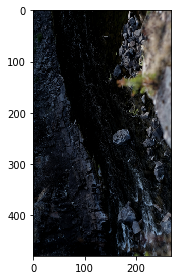

In [15]:
ex = photo_lr[2]
rescale_save_array_as_image(ex, "photo_on_photo_lowres.jpg")

ex = (ex + 1)/2
#ex = ex.swapaxes(0,1)

io.imshow(ex)

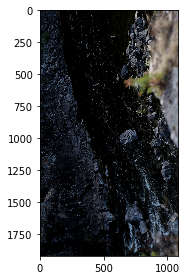

In [16]:
ex = photo_hr[2]
save_array_as_image(ex, "photo_on_photo_orig.jpg")

ex = (ex + 1)/2
#ex = ex.swapaxes(0,1)

io.imshow(ex)

In [ ]:
ex = upscaler.predict(photo_lr[[2]])[0]
save_array_as_image(ex, "photo_on_photo_upscaled.jpg")

ex = (ex + 1)/2
#ex = ex.swapaxes(0,1)

io.imshow(ex)